**Objetivo: Crear una herramienta de clasificación supervisada de las zonas de riesgo en Barcelona.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('dades.csv', delimiter=',', encoding='utf-8')

df

,districte_id,districte,barri,espai_id,data,hora,franja_horaria,semafor,num_menors_homes,num_adults_homes,...,altres,consum_cannabis,consum_alcohol,consum_altres_toxics,consum_inhalants,consum_psicofarmacs,consum_sense_determ,activitat_delictiva,salut_mental_impactant,zonas
0,1,Ciutat Vella,el Barri Gòtic,925671,2022-07-04,22:30,Nit,Verd,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo
1,1,Ciutat Vella,el Barri Gòtic,925671,2022-07-20,23:10,Nit,Verd,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo
2,1,Ciutat Vella,el Barri Gòtic,778411,2021-12-02,09:00,Matí,Verd,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo
3,1,Ciutat Vella,el Barri Gòtic,778411,2021-12-02,20:30,Nit,Verd,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo
4,1,Ciutat Vella,el Barri Gòtic,778411,2021-12-03,17:45,Tarda,Verd,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21339,10,Sant Martí,Sant Martí de Provençals,483162,2022-02-02,23:50,Nit,Verd,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo
21340,10,Sant Martí,Sant Martí de Provençals,483162,2022-02-03,18:00,Tarda,Verd,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo
21341,10,Sant Martí,Sant Martí de Provençals,483162,2022-02-05,18:00,Tarda,Verd,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo
21342,10,Sant Martí,Sant Martí de Provençals,483162,2022-02-07,20:30,Nit,Verd,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo


Se carga el dataframe contiene 21344 filas y 30 columnas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21344 entries, 0 to 21343
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   districte_id             21344 non-null  int64 
 1   districte                21344 non-null  object
 2   barri                    21344 non-null  object
 3   espai_id                 21344 non-null  int64 
 4   data                     21344 non-null  object
 5   hora                     21344 non-null  object
 6   franja_horaria           21344 non-null  object
 7   semafor                  21344 non-null  object
 8   num_menors_homes         21344 non-null  int64 
 9   num_adults_homes         21344 non-null  int64 
 10  num_per_determ_homes_18  21344 non-null  int64 
 11  num_per_determ_homes_21  21344 non-null  int64 
 12  num_menores_dones        21344 non-null  int64 
 13  num_adultes_dones        21344 non-null  int64 
 14  num_per_determ_dones_18  21344 non-nul

# Descripción de las variables:

* districte id: id de districte
* districte: El registro del distrito de Barcelona.
* barri: el barrio donde se hace el registro.
* espai_id: el lugar de la ciudad concreto, puede ser una calle, una plaza pero esta en forma de id.
* data: fecha en formato YYYY-MM-DD
* hora: hora que se ha obtenido la información.
* franja_horaria: la franja horaria de mañana, tarde o noche, en la que se ha obtenido la información.
* semafor: Vermell, Groc o Verd. Clasificación de riesgo (alto, medio o bajo) según el professional del espacio en ese momento concreto.
* num_menors_homes: número de menores hombres encontrados.
* num_adults_homes: número de adultos de 18 a 21 años encontrados.
* num_per_determ_homes_18: número de hombres menores de hasta 18 años, está por determinar.
* num_per_determ_homes_21: número de hombres adultos de hasta 21 años, está por determinar.
* num_menores_dones:número de menores mujeres encontrados.
* num_adultes_dones: número de mujeres de 18 a 21 años encontrados.
* num_per_determ_dones_18: número de mujeres menores de hasta 18 años, está por determinar.
* num_per_determ_dones_21: número de mujeres adultas de hasta 21 años, está por determinar.
* descripcio: breve descripción del profesional
* punt_trobada: si o no, es un punto de encuentro
* proximitat_recurs: si o no, hay un lugar (curso, centro...) donde los jóvenes se encuentran. 
* lloc_pernocta: si o no, se ha encontrado a alguna persona durmiendo en el lugar.
* consum_cannabis: si o no, se ha observado un consumo de cannabis.
* consum_alcohol: si o no, se ha observado un consumo de alcohol.
* consum_inhalants: si o no, se ha observado un consumo de inhalantes.
* consum_psicofarmacs: si o no, se ha observado un consumo de psicofármacos.
* consum_sense_determ: si o no, se ha observado un consumo de otras drogas (crack, globos...)
* activitat_delictiva: si o no, se han detectado actividades delictivas.
* salut_mental_impactant: si o no, se ha observado salut mental impactante.
* zonas: riesgo alto, medio o bajo.

In [4]:
df.isnull().sum()

districte_id                   0
districte                      0
barri                          0
espai_id                       0
data                           0
hora                           0
franja_horaria                 0
semafor                        0
num_menors_homes               0
num_adults_homes               0
num_per_determ_homes_18        0
num_per_determ_homes_21        0
num_menores_dones              0
num_adultes_dones              0
num_per_determ_dones_18        0
num_per_determ_dones_21        0
num_no_binari                  0
punt_trobada               17939
proximitat_recurs          19982
lloc_pernocta              19833
altres                     21181
consum_cannabis            20659
consum_alcohol             21162
consum_altres_toxics       21191
consum_inhalants           21229
consum_psicofarmacs        21279
consum_sense_determ        21257
activitat_delictiva        21257
salut_mental_impactant     21316
zonas                          0
dtype: int

Las variables "tick", respuesta si o no, son los que aparecen como valores nulos, pero en este caso son valores relevantes puesto que el dejarlo vacío también aporta información. Por ejemplo, el no consumo de una substancia en un lugar concreto implica la no identificación de una dinámica de impacto.

In [5]:
#Sumar los duplicados df
df.duplicated().sum()

290

Se detectan 290 valores duplicados, esto puede ser común, ya que en ocasiones a la hora de registrar puede suceder. Como hora y el día son los mismos se procede a eliminarlos.

In [6]:
#Eliminar los duplicados del df
df.drop_duplicates(inplace=True)
#observar si se realizó correctamente
df.duplicated().sum()

0

In [7]:
#Eliminar columnas que no aportan para el proyecto o tienen muy pocos datos

df.drop(['districte_id','altres','salut_mental_impactant','activitat_delictiva'], axis=1, inplace=True)
df.columns

Index(['districte', 'barri', 'espai_id', 'data', 'hora', 'franja_horaria',
       'semafor', 'num_menors_homes', 'num_adults_homes',
       'num_per_determ_homes_18', 'num_per_determ_homes_21',
       'num_menores_dones', 'num_adultes_dones', 'num_per_determ_dones_18',
       'num_per_determ_dones_21', 'num_no_binari', 'punt_trobada',
       'proximitat_recurs', 'lloc_pernocta', 'consum_cannabis',
       'consum_alcohol', 'consum_altres_toxics', 'consum_inhalants',
       'consum_psicofarmacs', 'consum_sense_determ', 'zonas'],
      dtype='object')

In [8]:
#Análisis estadístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
espai_id,21054.0,231532.154650,272320.692447,43112.0,59175.0,123772.0,364308.0,1341748.0
num_menors_homes,21054.0,0.107153,0.598779,0.0,0.0,0.0,0.0,17.0
num_adults_homes,21054.0,0.734587,1.938601,-3.0,0.0,0.0,1.0,50.0
num_per_determ_homes_18,21054.0,0.127149,0.810520,-4.0,0.0,0.0,0.0,30.0
num_per_determ_homes_21,21054.0,0.091907,0.610597,-2.0,0.0,0.0,0.0,20.0
num_menores_dones,21054.0,0.008359,0.155112,-2.0,0.0,0.0,0.0,8.0
num_adultes_dones,21054.0,0.013869,0.181555,-1.0,0.0,0.0,0.0,8.0
num_per_determ_dones_18,21054.0,0.010687,0.177138,-3.0,0.0,0.0,0.0,4.0
num_per_determ_dones_21,21054.0,0.005130,0.141150,-1.0,0.0,0.0,0.0,8.0
num_no_binari,21054.0,0.001235,0.111123,-2.0,0.0,0.0,0.0,8.0


Finalmente, quedan 21054 registros. Lo primero que destaca es que no puede ser las variables numericas sean negativas. Tratandose de personas, deben ser valores absolutos.

In [9]:
# Filtrar el DataFrame por valores negativos en varias columnas
df[(df[['num_per_determ_homes_21', 'num_menors_homes', 'num_adults_homes', 'num_per_determ_homes_18', 'num_per_determ_homes_21', 'num_menores_dones', 'num_adultes_dones', 'num_per_determ_dones_18', 'num_per_determ_dones_21', 'num_no_binari']] < 0).any(axis=1)]


,districte,barri,espai_id,data,hora,franja_horaria,semafor,num_menors_homes,num_adults_homes,num_per_determ_homes_18,...,punt_trobada,proximitat_recurs,lloc_pernocta,consum_cannabis,consum_alcohol,consum_altres_toxics,consum_inhalants,consum_psicofarmacs,consum_sense_determ,zonas
116,Ciutat Vella,el Barri Gòtic,231806,2022-09-07,10:50,Matí,Verd,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medio
326,Ciutat Vella,el Barri Gòtic,723946,2022-01-18,18:50,Tarda,Verd,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alto
603,Ciutat Vella,el Raval,922523,2022-08-24,11:00,Matí,Verd,0,0,0,...,NaN,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo
1171,Ciutat Vella,el Raval,59179,2023-05-17,19:00,Tarda,Verd,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medio
1237,Ciutat Vella,el Raval,59179,2023-07-31,13:15,Tarda,Verd,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medio
1760,Ciutat Vella,el Raval,58601,2022-03-03,23:00,Nit,Verd,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medio
1762,Ciutat Vella,el Raval,58601,2022-03-04,18:00,Tarda,Verd,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medio
2354,Ciutat Vella,el Raval,364308,2021-09-22,10:00,Matí,Verd,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medio
2679,Ciutat Vella,el Raval,364308,2023-08-29,19:30,Tarda,Groc,0,3,-1,...,t,t,t,NaN,NaN,NaN,NaN,NaN,NaN,Medio
3399,Ciutat Vella,el Raval,854535,2022-08-24,11:20,Matí,Verd,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medio


Una vez se observan las filas, se detecta que es un error de registro, por lo que se pasan a valores absolutos.

In [10]:

columnas_absolutas = ['num_menors_homes', 'num_adults_homes', 'num_per_determ_homes_18', 
                          'num_per_determ_homes_21', 'num_menores_dones', 'num_adultes_dones', 
                          'num_per_determ_dones_18', 'num_per_determ_dones_21', 'num_no_binari']

# Iterar sobre cada columna y aplicar la función abs()
for columna in columnas_absolutas:
    df[columna] = df[columna].abs()

In [11]:
#Análisis estadístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
espai_id,21054.0,231532.154650,272320.692447,43112.0,59175.0,123772.0,364308.0,1341748.0
num_menors_homes,21054.0,0.107153,0.598779,0.0,0.0,0.0,0.0,17.0
num_adults_homes,21054.0,0.734872,1.938493,0.0,0.0,0.0,1.0,50.0
num_per_determ_homes_18,21054.0,0.127909,0.810401,0.0,0.0,0.0,0.0,30.0
num_per_determ_homes_21,21054.0,0.092476,0.610511,0.0,0.0,0.0,0.0,20.0
num_menores_dones,21054.0,0.008644,0.155096,0.0,0.0,0.0,0.0,8.0
num_adultes_dones,21054.0,0.014534,0.181503,0.0,0.0,0.0,0.0,8.0
num_per_determ_dones_18,21054.0,0.014962,0.176828,0.0,0.0,0.0,0.0,4.0
num_per_determ_dones_21,21054.0,0.005605,0.141132,0.0,0.0,0.0,0.0,8.0
num_no_binari,21054.0,0.003895,0.111061,0.0,0.0,0.0,0.0,8.0


Ahora si que se tiene sentido que los valores mínimos sean 0. 
Ya se puede apreciar en un primer momento que en general los registros tienen datos muy bajos. Porque en el 75% de los datos los valores son 0. Como hay tan pocos datos numéricos, se toma la decisión de agrupar las variables en  hombres y mujeres, porque al final se tratan de los mismos datos

In [12]:
# Crear una nueva columna llamada 'hombres' que representa la suma de las columnas relacionadas con los hombres
df['homes'] = df['num_menors_homes'] + df['num_adults_homes'] + df['num_per_determ_homes_18'] + df['num_per_determ_homes_21']

# Crear una nueva columna llamada 'dones' que representa la suma de las columnas relacionadas con las mujeres
df['dones'] = df['num_menores_dones'] + df['num_adultes_dones'] + df['num_per_determ_dones_18'] + df['num_per_determ_dones_21']

df.drop(['num_menors_homes', 'num_adults_homes', 'num_per_determ_homes_18','num_per_determ_homes_21','num_menores_dones', 'num_adultes_dones',
       'num_per_determ_dones_18', 'num_per_determ_dones_21'], axis=1, inplace=True)


Se agrupan las variables en hombres, mujeres y personas no binarias.

In [13]:
#Análisis estadístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
espai_id,21054.0,231532.154650,272320.692447,43112.0,59175.0,123772.0,364308.0,1341748.0
num_no_binari,21054.0,0.003895,0.111061,0.0,0.0,0.0,0.0,8.0
homes,21054.0,1.062411,2.446812,0.0,0.0,0.0,1.0,50.0
dones,21054.0,0.043745,0.347119,0.0,0.0,0.0,0.0,8.0


In [14]:
df['consum_cannabis'].unique()

array([nan, 't'], dtype=object)

Se pasan a numéricas las variables, para poder visualizar y utilizar más adelante en los modelos.

In [15]:
# Lista de columnas a codificar
columnas_a_transformar = ['punt_trobada', 'proximitat_recurs', 'lloc_pernocta','consum_cannabis', 'consum_alcohol', 'consum_altres_toxics', 
                          'consum_inhalants', 'consum_psicofarmacs', 'consum_sense_determ']


# Reemplazar 't' por 1 en las columnas a codificar
for columna in columnas_a_transformar:
    df[columna].replace('t', 1, inplace=True)

# Llenar valores NaN con 0 en todas las columnas
df[columnas_a_transformar] = df[columnas_a_transformar].fillna(0)

In [16]:
df['consum_cannabis'].unique()

array([0., 1.])

Se agrupan las variables de consumo de drogas, ya que las variables relacionadas con diferentes drogas están altamente correlacionadas entre sí, agruparlas en una sola variable puede simplificar el análisis, reducir la dimensionalidad y centrar la atención en las tendencias generales.

In [17]:
# Crear una nueva columna llamada 'consum' que contenga la suma de las columnas
df['consum'] = df['consum_cannabis'] + df['consum_alcohol'] + df['consum_altres_toxics'] + df['consum_inhalants'] + df['consum_psicofarmacs'] + df['consum_sense_determ']

#Eliminar las columnas sumadas de consum
df.drop(['consum_cannabis', 'consum_alcohol',
       'consum_altres_toxics', 'consum_inhalants', 'consum_psicofarmacs',
       'consum_sense_determ'], axis=1, inplace=True)

In [18]:
#Análisis estadístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
espai_id,21054.0,231532.154650,272320.692447,43112.0,59175.0,123772.0,364308.0,1341748.0
num_no_binari,21054.0,0.003895,0.111061,0.0,0.0,0.0,0.0,8.0
punt_trobada,21054.0,0.160255,0.366851,0.0,0.0,0.0,0.0,1.0
proximitat_recurs,21054.0,0.064121,0.244974,0.0,0.0,0.0,0.0,1.0
lloc_pernocta,21054.0,0.071435,0.257557,0.0,0.0,0.0,0.0,1.0
homes,21054.0,1.062411,2.446812,0.0,0.0,0.0,1.0,50.0
dones,21054.0,0.043745,0.347119,0.0,0.0,0.0,0.0,8.0
consum,21054.0,0.060701,0.295827,0.0,0.0,0.0,0.0,4.0


In [19]:
# Suponiendo que 'data' es una columna en tu DataFrame
df['data'] = pd.to_datetime(df['data'])

# Extraer el año de la columna 'data'
df['año'] = df['data'].dt.year



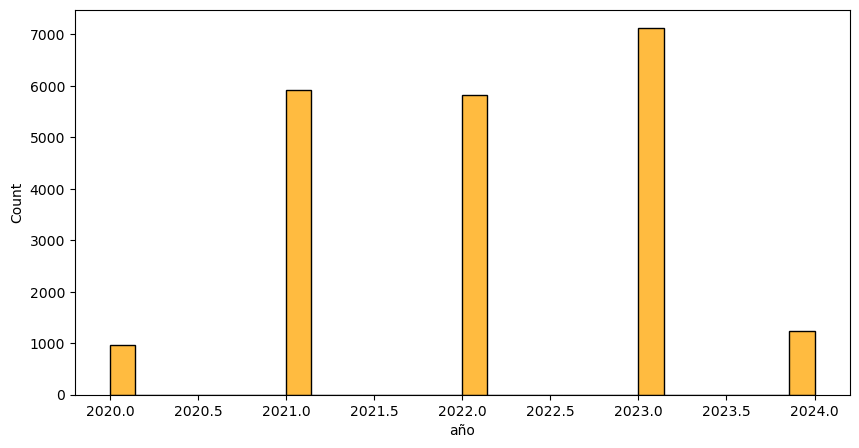

In [20]:
#Datos que tenemos segun el año
plt.figure(figsize=(10, 5))
sns.histplot(df['año'], bins='auto', kde=False, color='orange')
plt.show()

En este gráfico se observa el número de registros en relación al año. Por lo que se detencta un reducido número de registros el 2020, ya que es cuando se empezó a utilizar este tipo de registros. El 2024, porque solo han pasado unos meses desde que empezó el año.

In [21]:
# Convertir la columna 'data' a tipo datetime
df['data'] = pd.to_datetime(df['data'])

# Definir una función para obtener la estación del año
def obtener_estacion(fecha):
    mes = fecha.month
    if 3 <= mes <= 5:
        return 'Primavera'
    elif 6 <= mes <= 8:
        return 'Estiu'
    elif 9 <= mes <= 11:
        return 'Tardor'
    else:
        return 'Hivern'

# Aplicar la función a la columna 'data' para obtener la estación del año y crear una nueva columna
df['estacio'] = df['data'].apply(obtener_estacion)

Se crea una nueva columna con las estaciones del año, quizá nos pueda ser útil y podamos encontrar diferencias.

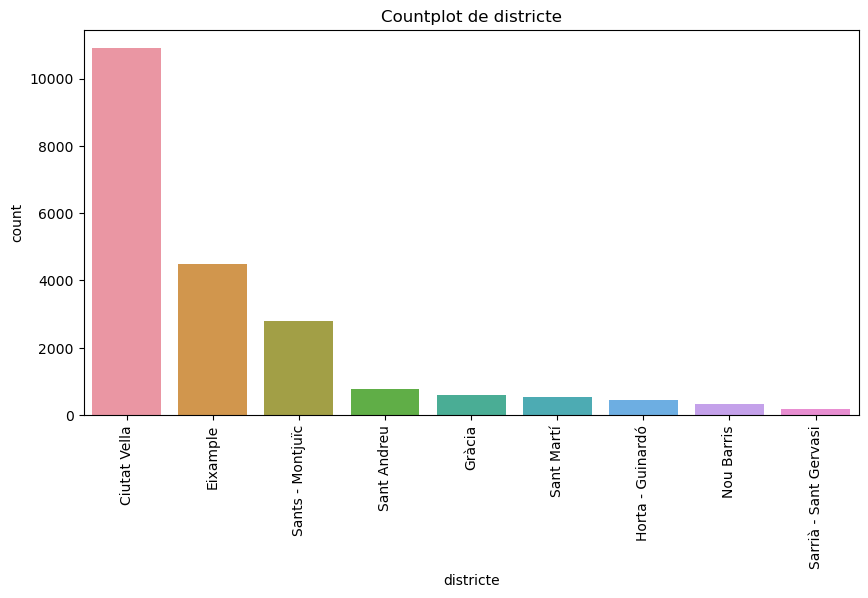

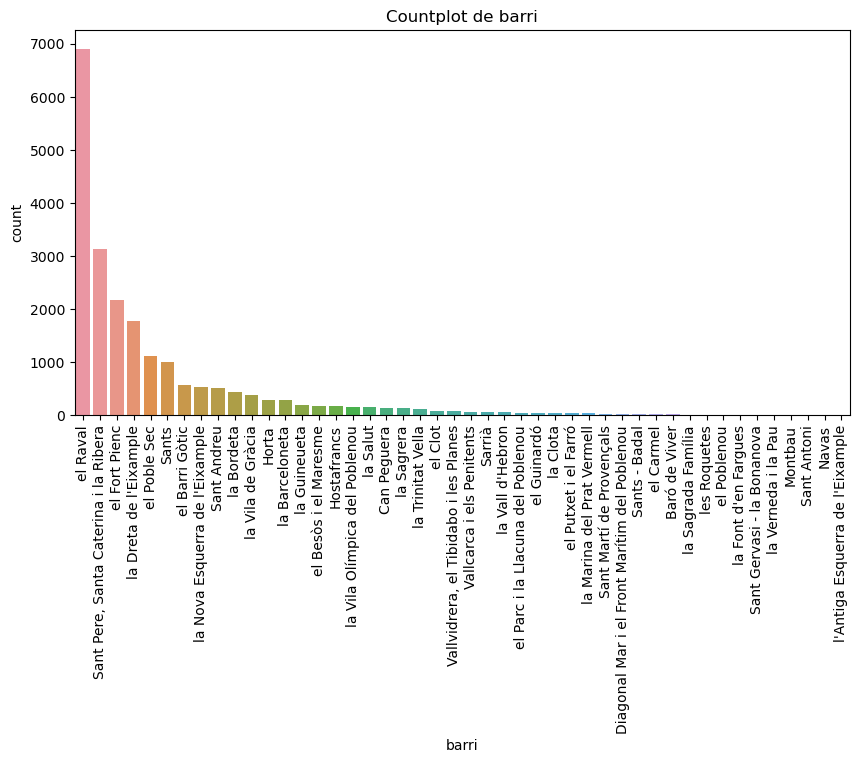

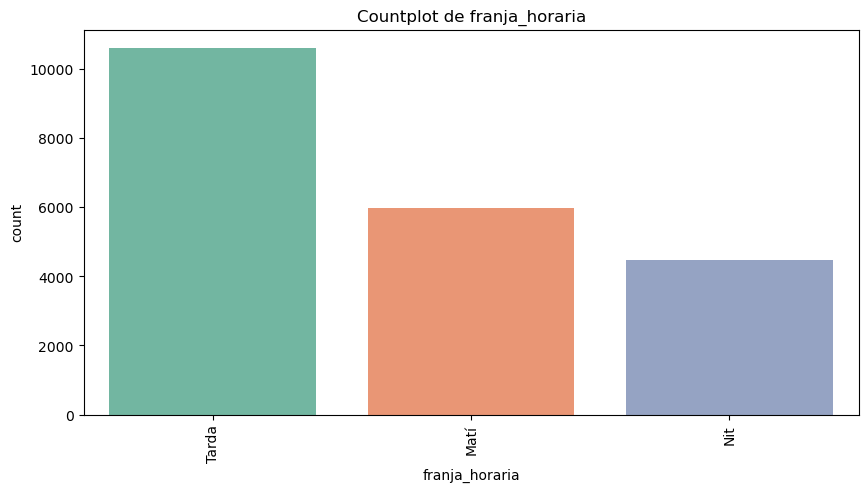

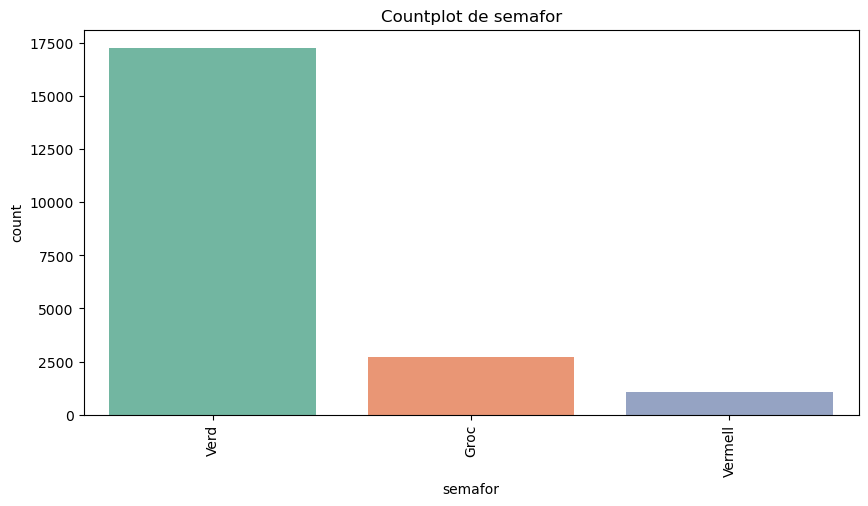

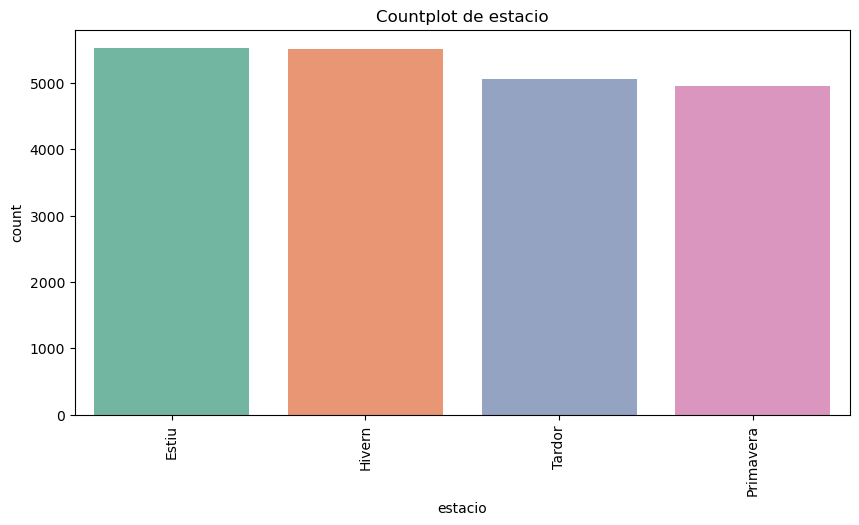

In [22]:
columns = ('districte', 'barri', 'franja_horaria', 'semafor', 'estacio')
    
sns.set_palette('Set2')
    
# Iterar sobre las columnas y crear los gráficos countplot
for col in columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Countplot de {col}')
    plt.xticks(rotation=90)  
    plt.show()


Habitualmente se obtiene una mayor información de determinados barrios respecto a otros, debido a que el riesgo es diferente. Por lo tanto la información no está compensada.
En relación a la franja horaria, se obtiene mucha más información en horario de tarde, que es cuando realmente hay una mayor presencia a nivel profesional, ya que el encargo así lo requiere.
En las estaciones del año, está bastante equilibrado. Quizá un ligero incremento en verano possiblemente producto de la llegada de nuevos profesionales en esa época que implica una mayor obtención de información.

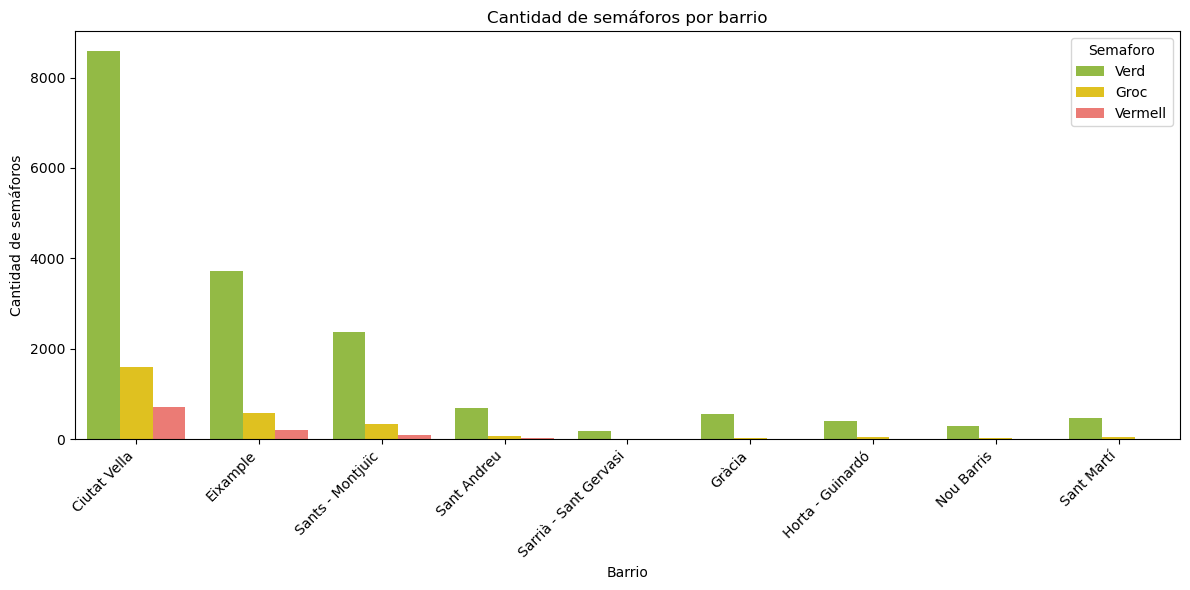

In [23]:
colores_pastel = {'Verd': '#9ACD32',  # Verde pastel
                  'Vermell': '#FF6961',  # Rojo pastel
                  'Groc': '#FFD700'}  # Amarillo pastel

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  
sns.countplot(data=df, x='districte', hue='semafor', palette=colores_pastel)

# Ajustar las etiquetas del eje x para que no se superpongan
plt.xticks(rotation=45, ha='right')

# Añadir título y etiquetas de los ejes
plt.title('Cantidad de semáforos por barrio')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de semáforos')

# Mostrar el gráfico
plt.legend(title='Semaforo')  # Mostrar leyenda con título
plt.tight_layout()  # Ajustar diseño del gráfico
plt.show()

En esta visualización se detecta que determinados barrios tienen un riesgo mayor en relación a otros. Sobretodo ciutat vella, eixample i sants.

<AxesSubplot:xlabel='estacio', ylabel='count'>

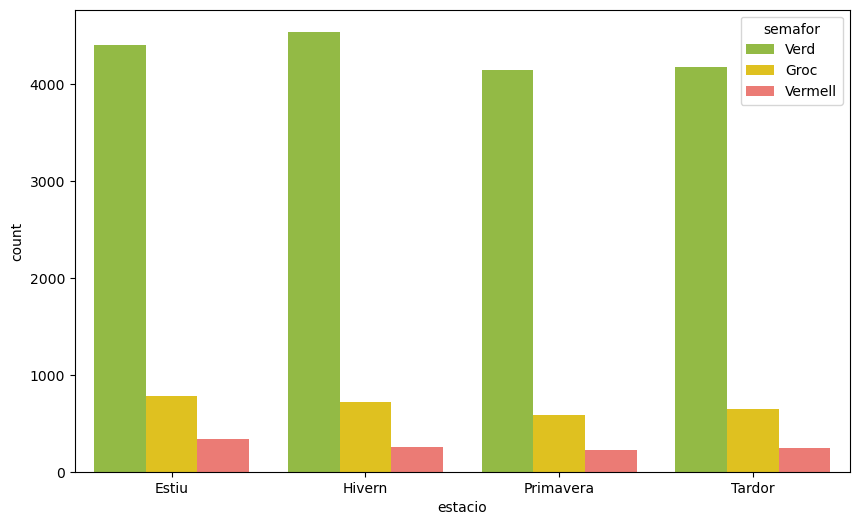

In [24]:
plt.figure(figsize=(10,6))

# Crear el gráfico utilizando la paleta personalizada
sns.countplot(data=df, x='estacio', hue='semafor', palette=colores_pastel)


Se observa un equilibrio entre los diferentes registros por riesgo de impacto y las estaciones del año.

<AxesSubplot:xlabel='franja_horaria', ylabel='count'>

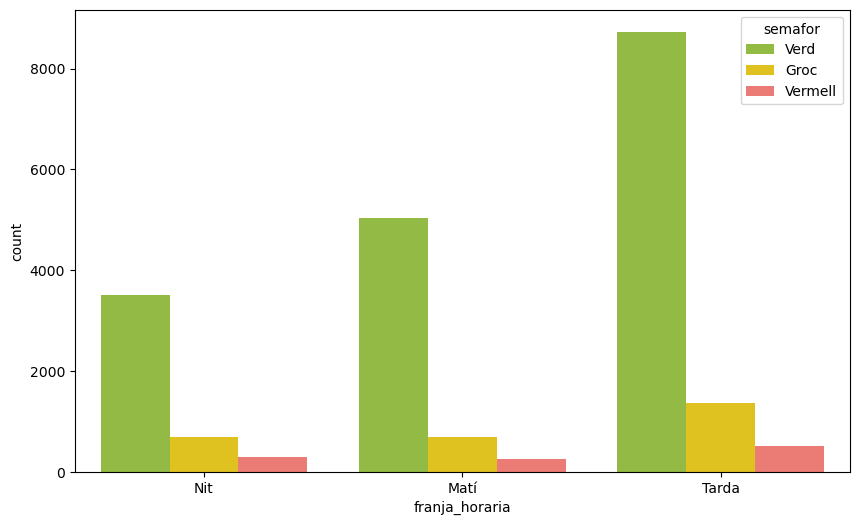

In [25]:
plt.figure(figsize=(10,6))

# Crear el gráfico utilizando la paleta personalizada
sns.countplot(data=df, x='franja_horaria', hue='semafor', palette=colores_pastel)

En este gráfico se visualiza que la cantidad de registros es ligeramente superior en el horario de tarde, como ya se observó anteriormente, aunque la identificación de las diferentes tipologias de riesgos se ha mantenido en las diferentes franjas horarias.

<AxesSubplot:xlabel='lloc_pernocta', ylabel='count'>

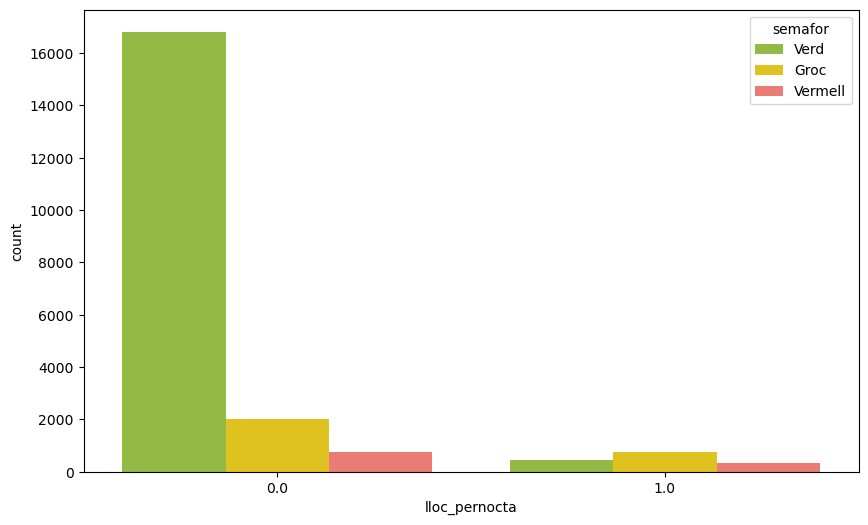

In [26]:
plt.figure(figsize=(10,6))

# Crear el gráfico utilizando la paleta personalizada
sns.countplot(data=df, x='lloc_pernocta', hue='semafor', palette=colores_pastel)

In [27]:
df.pivot_table(index='semafor', columns='estacio', aggfunc='size', fill_value=0)

estacio,Estiu,Hivern,Primavera,Tardor
semafor,,,,
Groc,785,716,588,644
Verd,4405,4543,4143,4177
Vermell,336,254,220,243


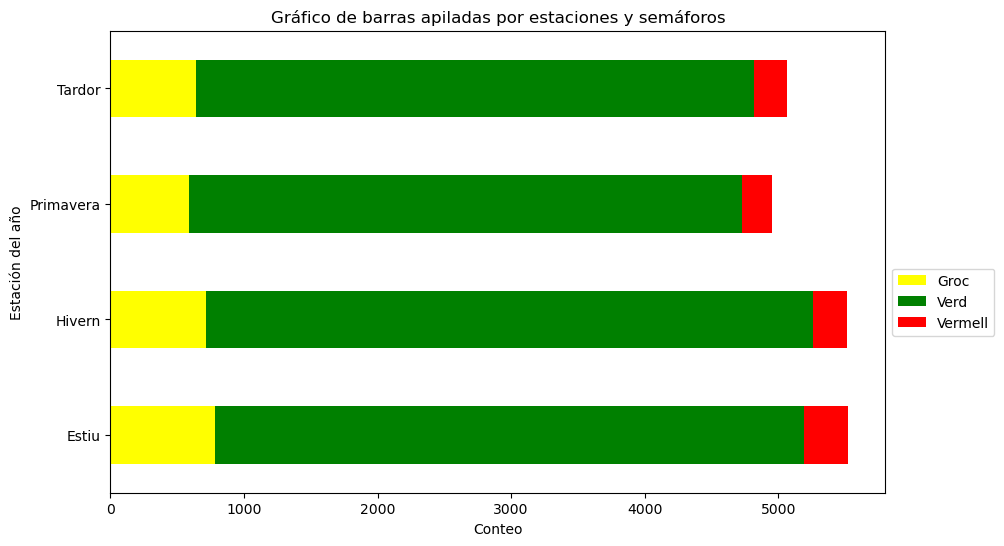

In [28]:

# Crear la tabla dinámica
pivot_table = df.pivot_table(index='estacio', columns='semafor', aggfunc='size', fill_value=0)

# Definir una paleta de colores personalizada para el semáforo
colores_semaforo = {'Groc': 'yellow', 'Verd': 'green', 'Vermell': 'red'}

# Obtener los nombres de las categorías del semáforo
categorias_semaforo = list(colores_semaforo.keys())

# Crear una lista de colores ordenada según el orden de las categorías
colores = [colores_semaforo[categoria] for categoria in categorias_semaforo]

# Crear el gráfico de barras apiladas horizontal con la paleta personalizada
pivot_table.plot(kind='barh', stacked=True, figsize=(10, 6), color=colores)

# Colocar la leyenda fuera del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# Añadir título y etiquetas de los ejes
plt.title('Gráfico de barras apiladas por estaciones y semáforos')
plt.xlabel('Conteo')
plt.ylabel('Estación del año')
plt.show()


En este gráfico se observa como sobretodo en invierno y en verano, hay un incremento en los riesgos medio y alto. En relación al resto del año.

In [29]:
df.columns

Index(['districte', 'barri', 'espai_id', 'data', 'hora', 'franja_horaria',
       'semafor', 'num_no_binari', 'punt_trobada', 'proximitat_recurs',
       'lloc_pernocta', 'zonas', 'homes', 'dones', 'consum', 'año', 'estacio'],
      dtype='object')

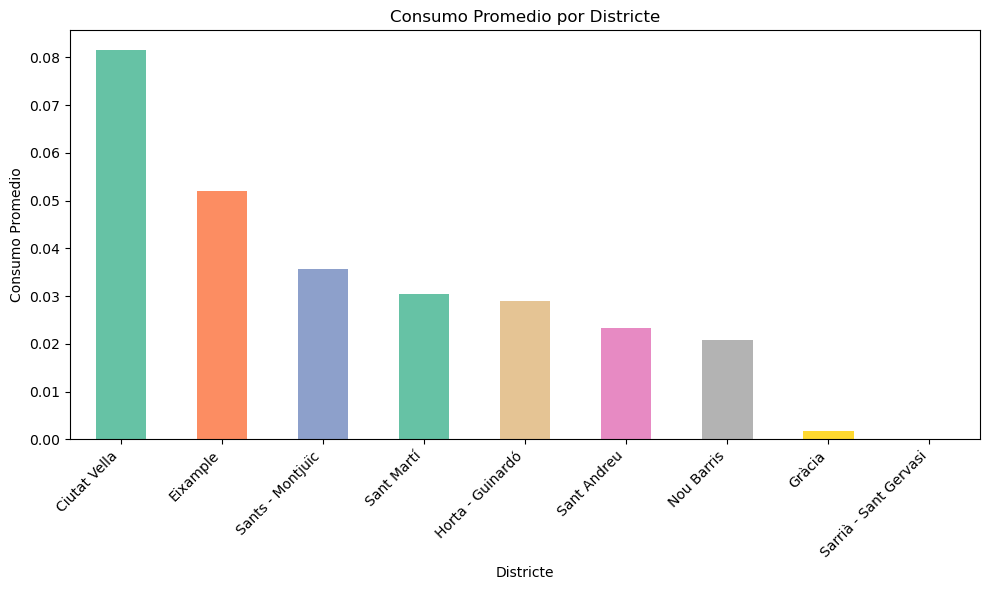

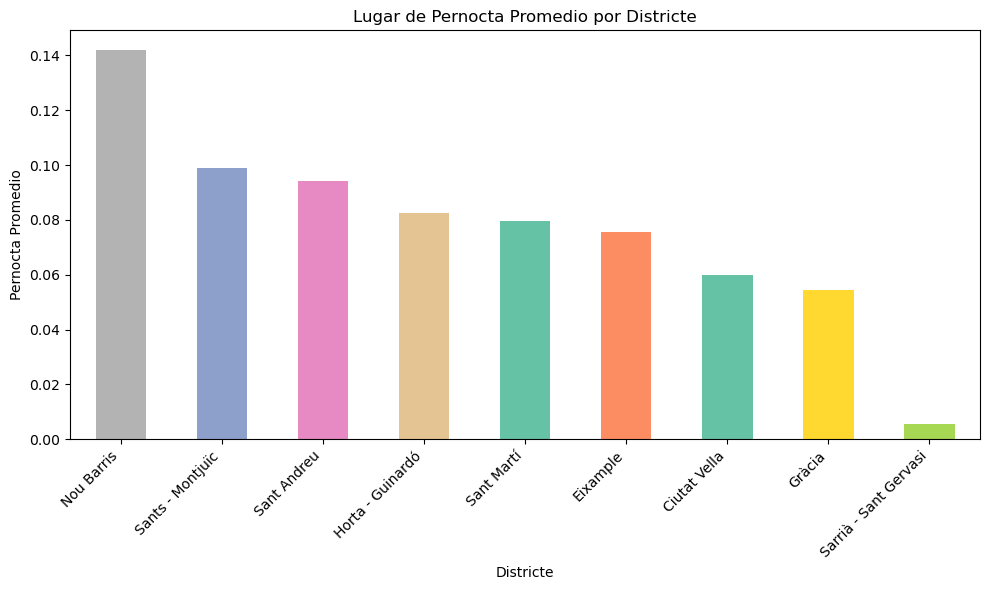

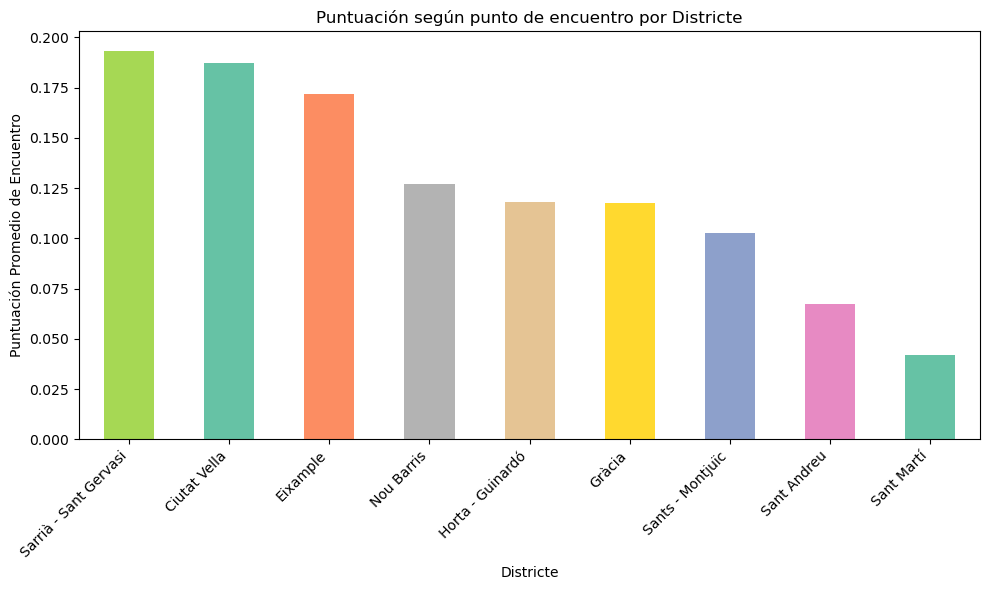

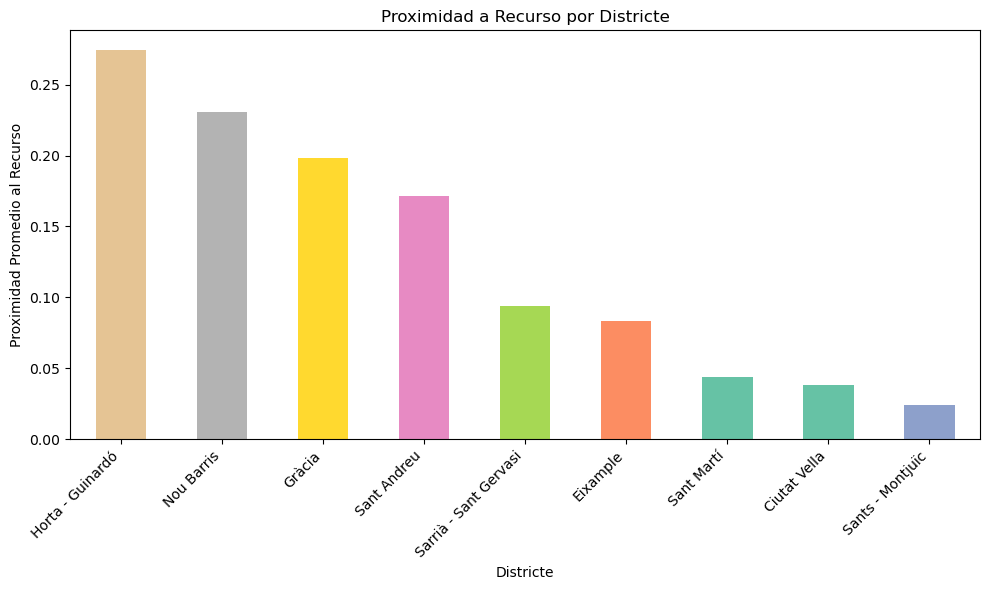

In [30]:
# Importar las librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el esquema de color
sns.set_palette('Set2')

# Crear un diccionario que mapea cada barrio a un color específico del esquema 'Set2'
colores_por_barrio = {}
for i, barrio in enumerate(df['districte'].unique()):
    colores_por_barrio[barrio] = sns.color_palette('Set2')[i % len(sns.color_palette('Set2'))]

# Agrupar los datos por la variable 'barrio' y calcular el consumo promedio para cada barrio
consumo_promedio_por_barrio_consumo = df.groupby('districte')['consum'].mean().sort_values(ascending=False)
consumo_promedio_por_barrio_lloc_pernocta = df.groupby('districte')['lloc_pernocta'].mean().sort_values(ascending=False)
consumo_promedio_por_barrio_punt_trobada = df.groupby('districte')['punt_trobada'].mean().sort_values(ascending=False)
consumo_promedio_por_barrio_proximitat_recurs = df.groupby('districte')['proximitat_recurs'].mean().sort_values(ascending=False)

# Crear los gráficos de barras con los mismos colores para cada barrio

# Consumo Promedio
plt.figure(figsize=(10, 6))
consumo_promedio_por_barrio_consumo.plot(kind='bar', color=[colores_por_barrio[barrio] for barrio in consumo_promedio_por_barrio_consumo.index])
plt.xlabel('Districte')
plt.ylabel('Consumo Promedio')
plt.title('Consumo Promedio por Districte')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

# Lugar de Pernocta Promedio
plt.figure(figsize=(10, 6))
consumo_promedio_por_barrio_lloc_pernocta.plot(kind='bar', color=[colores_por_barrio[barrio] for barrio in consumo_promedio_por_barrio_lloc_pernocta.index])
plt.xlabel('Districte')
plt.ylabel('Pernocta Promedio')
plt.title('Lugar de Pernocta Promedio por Districte')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

# Puntuación Promedio de Encuentro
plt.figure(figsize=(10, 6))
consumo_promedio_por_barrio_punt_trobada.plot(kind='bar', color=[colores_por_barrio[barrio] for barrio in consumo_promedio_por_barrio_punt_trobada.index])
plt.xlabel('Districte')
plt.ylabel('Puntuación Promedio de Encuentro')
plt.title('Puntuación según punto de encuentro por Districte')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

# Proximidad Promedio al Recurso
plt.figure(figsize=(10, 6))
consumo_promedio_por_barrio_proximitat_recurs.plot(kind='bar', color=[colores_por_barrio[barrio] for barrio in consumo_promedio_por_barrio_proximitat_recurs.index])
plt.xlabel('Districte')
plt.ylabel('Proximidad Promedio al Recurso')
plt.title('Proximidad a Recurso por Districte')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

- Consumo: Como era de esperar, el barrio con mayor consumo de drogas es Ciutat Vella.
- Lugar de pernocta: Nou Barris,se trata de un barrio tranquilo, por lo que la mayoría de registros son debido a pernoctas, por ello aparece el alto número. En el barrio de sants tiene muchos lugares de pernocta en las zonas de montjuïc, así que tiene sentido el alto número de pernoctas.
- Punto de encuentro: es sorprendente detectar a sarrià con el mayor promedio estrechamente seguido de ciutat vella. Esto es debido a los pocos datos del barrio de sarrià, de los pocos datos que tenemos todos son por punto de encuentro. Mientras que en CV aunque seguro hay más, se pueden 
- Proximidad Promedio al recurso, los barrios que mayor promedio tienen son aquellos barrios que tienen o han tenido durante el tiempo de registros alojamientos residenciales para jóvenes o personas sin hogar.

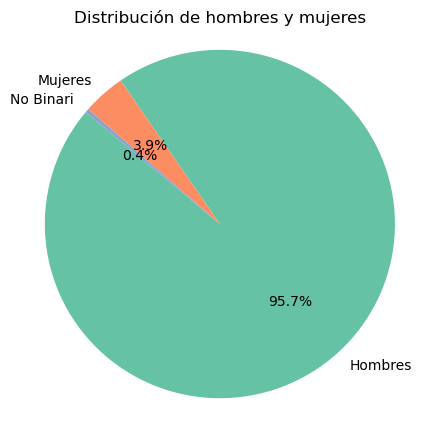

In [47]:
# Sumar todos los valores de hombres y mujeres
total_hombres = df['homes'].sum()
total_mujeres = df['dones'].sum()
total_no_binari = df['num_no_binari'].sum()

etiquetas = ['Hombres', 'Mujeres', 'No Binari']

# Crear una lista con los valores de hombres y mujeres
valores = [total_hombres, total_mujeres, total_no_binari]

# Crear el gráfico de pastel
plt.figure(figsize=(5, 5))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de hombres y mujeres')
plt.axis('equal')
plt.show()

La gran mayoría de personas dectectadas son hombres. El porcentaje de mujeres 3,9% es muy bajo. Y el de personas no binarias es casi imperceptible, 0.4%.

<Figure size 900x600 with 0 Axes>

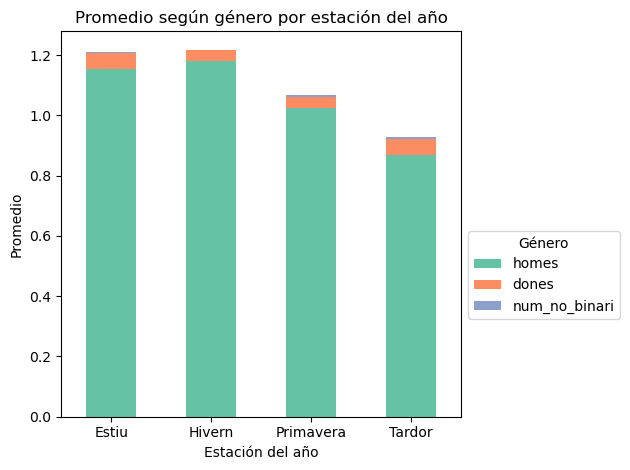

In [32]:
promedios = df.groupby('estacio').mean()[['homes', 'dones', 'num_no_binari']]

# Crear el gráfico de barras apiladas
plt.figure(figsize=(9, 6))
promedios.plot(kind='bar', stacked=True)
plt.xlabel('Estación del año')
plt.ylabel('Promedio')
plt.title('Promedio según género por estación del año')
plt.xticks(rotation=0) 
plt.legend(title='Género',loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


Cruzando las variables de género con las de estacón del año, se observa que el número crece en epocas de verano e invierno. Queadndo en menor número la primavera y el otoño.

<Figure size 1000x600 with 0 Axes>

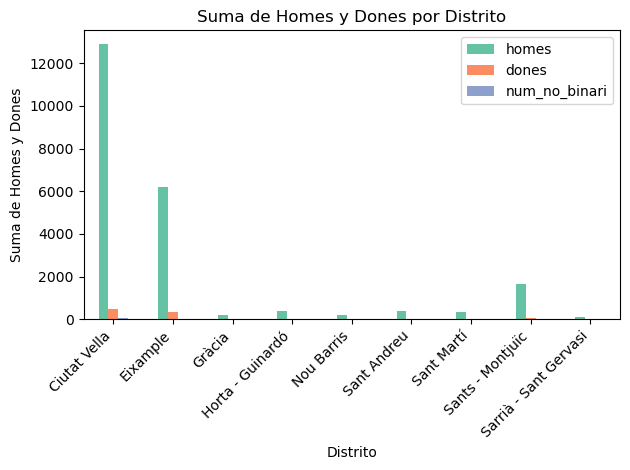

In [46]:
# Calcular la suma de 'homes' y 'dones' para cada barrio
suma_homes_dones_por_barrio = df.groupby('districte')[['homes', 'dones', 'num_no_binari']].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
suma_homes_dones_por_barrio.plot(kind='bar')
plt.xlabel('Distrito')
plt.ylabel('Suma de Homes y Dones')
plt.title('Suma de Homes y Dones por Distrito')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


Donde se detecta un mayor número de jóvenes es en ciutat Vella, se observa que el número de mujeres y personas no binarias es muy inferior, obteniendo valores muy bajos.
Los otros dos Distritos donde se detecta un mayor número de personas son eixample i sants-montjuïc.

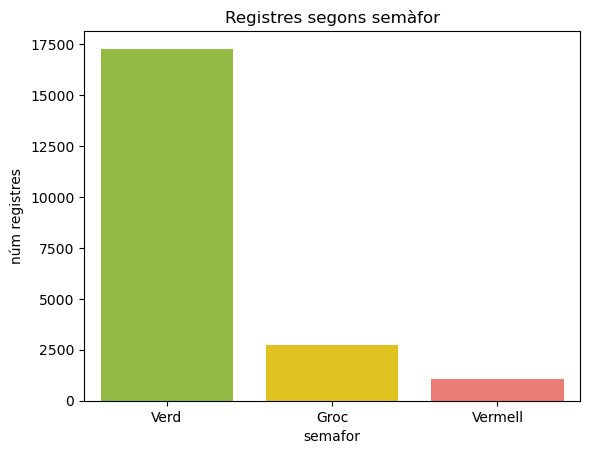

In [33]:
sns.countplot(data=df, x='semafor', order=df['semafor'].value_counts().index, palette=colores_pastel)
plt.title('Registres segons semàfor')
plt.ylabel('núm registres')
plt.show()

Aquí se observa claramente que el número de registros en relación a la variable semáforo no es equitativa. Sinó que el número de registros en verde es altamente superior. En relación a los registros amarillos y rojos. Dato importante, porque a la hora de crear un modelo puede ser un impedimento, que los datos no sean equilibrados.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21054 entries, 0 to 21343
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   districte          21054 non-null  object        
 1   barri              21054 non-null  object        
 2   espai_id           21054 non-null  int64         
 3   data               21054 non-null  datetime64[ns]
 4   hora               21054 non-null  object        
 5   franja_horaria     21054 non-null  object        
 6   semafor            21054 non-null  object        
 7   num_no_binari      21054 non-null  int64         
 8   punt_trobada       21054 non-null  float64       
 9   proximitat_recurs  21054 non-null  float64       
 10  lloc_pernocta      21054 non-null  float64       
 11  zonas              21054 non-null  object        
 12  homes              21054 non-null  int64         
 13  dones              21054 non-null  int64         
 14  consum

In [35]:
#Guardar df en archivo csv
df.to_csv('dades_EDA.csv', index=False)

In [36]:
df

,districte,barri,espai_id,data,hora,franja_horaria,semafor,num_no_binari,punt_trobada,proximitat_recurs,lloc_pernocta,zonas,homes,dones,consum,año,estacio
0,Ciutat Vella,el Barri Gòtic,925671,2022-07-04,22:30,Nit,Verd,0,0.0,0.0,0.0,Bajo,0,0,0.0,2022,Estiu
1,Ciutat Vella,el Barri Gòtic,925671,2022-07-20,23:10,Nit,Verd,0,0.0,0.0,0.0,Bajo,0,0,0.0,2022,Estiu
2,Ciutat Vella,el Barri Gòtic,778411,2021-12-02,09:00,Matí,Verd,0,0.0,0.0,0.0,Bajo,0,0,0.0,2021,Hivern
3,Ciutat Vella,el Barri Gòtic,778411,2021-12-02,20:30,Nit,Verd,0,0.0,0.0,0.0,Bajo,0,0,0.0,2021,Hivern
4,Ciutat Vella,el Barri Gòtic,778411,2021-12-03,17:45,Tarda,Verd,0,0.0,0.0,0.0,Bajo,0,0,0.0,2021,Hivern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21339,Sant Martí,Sant Martí de Provençals,483162,2022-02-02,23:50,Nit,Verd,0,0.0,1.0,0.0,Bajo,2,0,0.0,2022,Hivern
21340,Sant Martí,Sant Martí de Provençals,483162,2022-02-03,18:00,Tarda,Verd,0,0.0,0.0,0.0,Bajo,2,0,0.0,2022,Hivern
21341,Sant Martí,Sant Martí de Provençals,483162,2022-02-05,18:00,Tarda,Verd,0,0.0,0.0,0.0,Bajo,1,0,0.0,2022,Hivern
21342,Sant Martí,Sant Martí de Provençals,483162,2022-02-07,20:30,Nit,Verd,0,0.0,0.0,0.0,Bajo,0,0,0.0,2022,Hivern
